#### OBJECTIVE

### To build a machine learning model that predicts the likelihood that a customer will churn based on the given features.

In [1]:
#!pip install -U ydata-profiling

In [2]:
#importing useful libraies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


# For Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries-(The machine learning algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder

# For any error occured in importing the above libraries, pip install the below:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


# To ignore/disable warnings
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

# ASSESSING DATA

In [3]:
# reading in data
data = pd.read_excel(r"C:\Users\gideonokomayin\OneDrive - FLOUR MILLS OF NIGERIA PLC\Desktop\CHURN PROJECT\Customer-Churn.xlsx")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#statistical distributon of num_feat
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
#statistical distribution of cat_feat
data.describe(exclude=['int64','float64'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [7]:
#checking for missing features
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#checking for data duplicates
data.duplicated().sum()

0

## Observation

- From the data summary we observed that CustomerID (a categorical feature) is a unique identifier since it returned the entire count of 7043 as unique. This shows a large number of unique categories (i.e. high cardinality). We may consider dropping this feature later as we progress into ML after considering other factors and its level of importance.
- There are 11 missing values in the TotalChrges features 
- The target varable (Churn) has 2 unique values

In [9]:
#Churn
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## EDA
#### Univariate Analysis

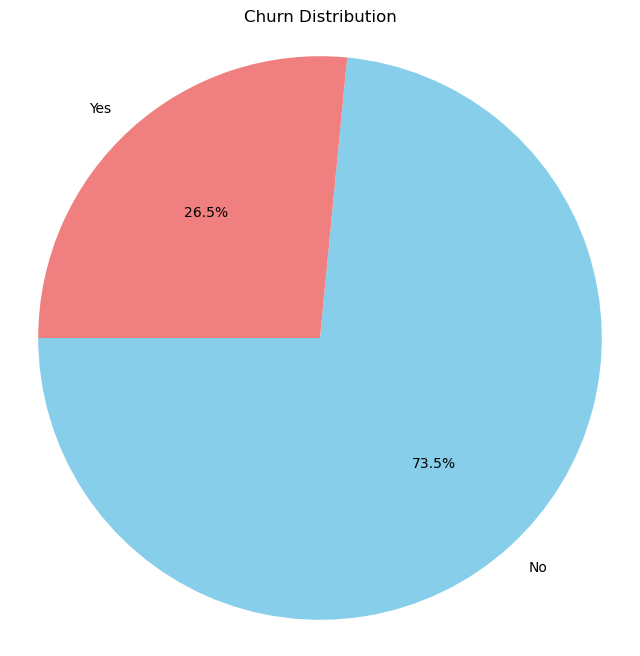

In [10]:
#target(dependant variable)
# Count the number of each category
churn_counts = data['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=180, colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

### Observation

- This analysis shows that over one-quarter(above 25%) of the entire customers had cancelled there services


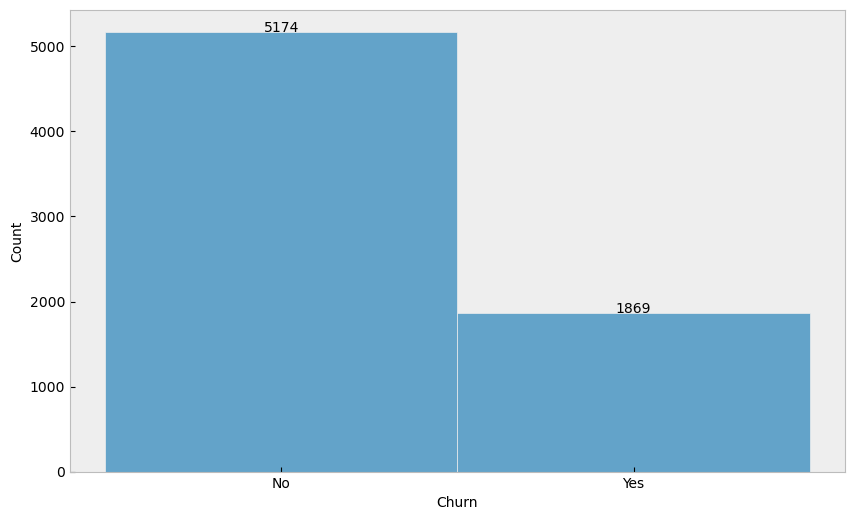

In [11]:
plt.style.use('bmh')
plt.figure(figsize=(10, 6))

# Create a histogram
ax = sb.histplot(data['Churn'])

# Remove grid lines
ax.grid(False)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


In [12]:
#creating cat_features & num_feats for easy analysis
num_feat = data.select_dtypes(include=['float64','int64'])
cat_feat = data.select_dtypes(include=['object'])
num_feat.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


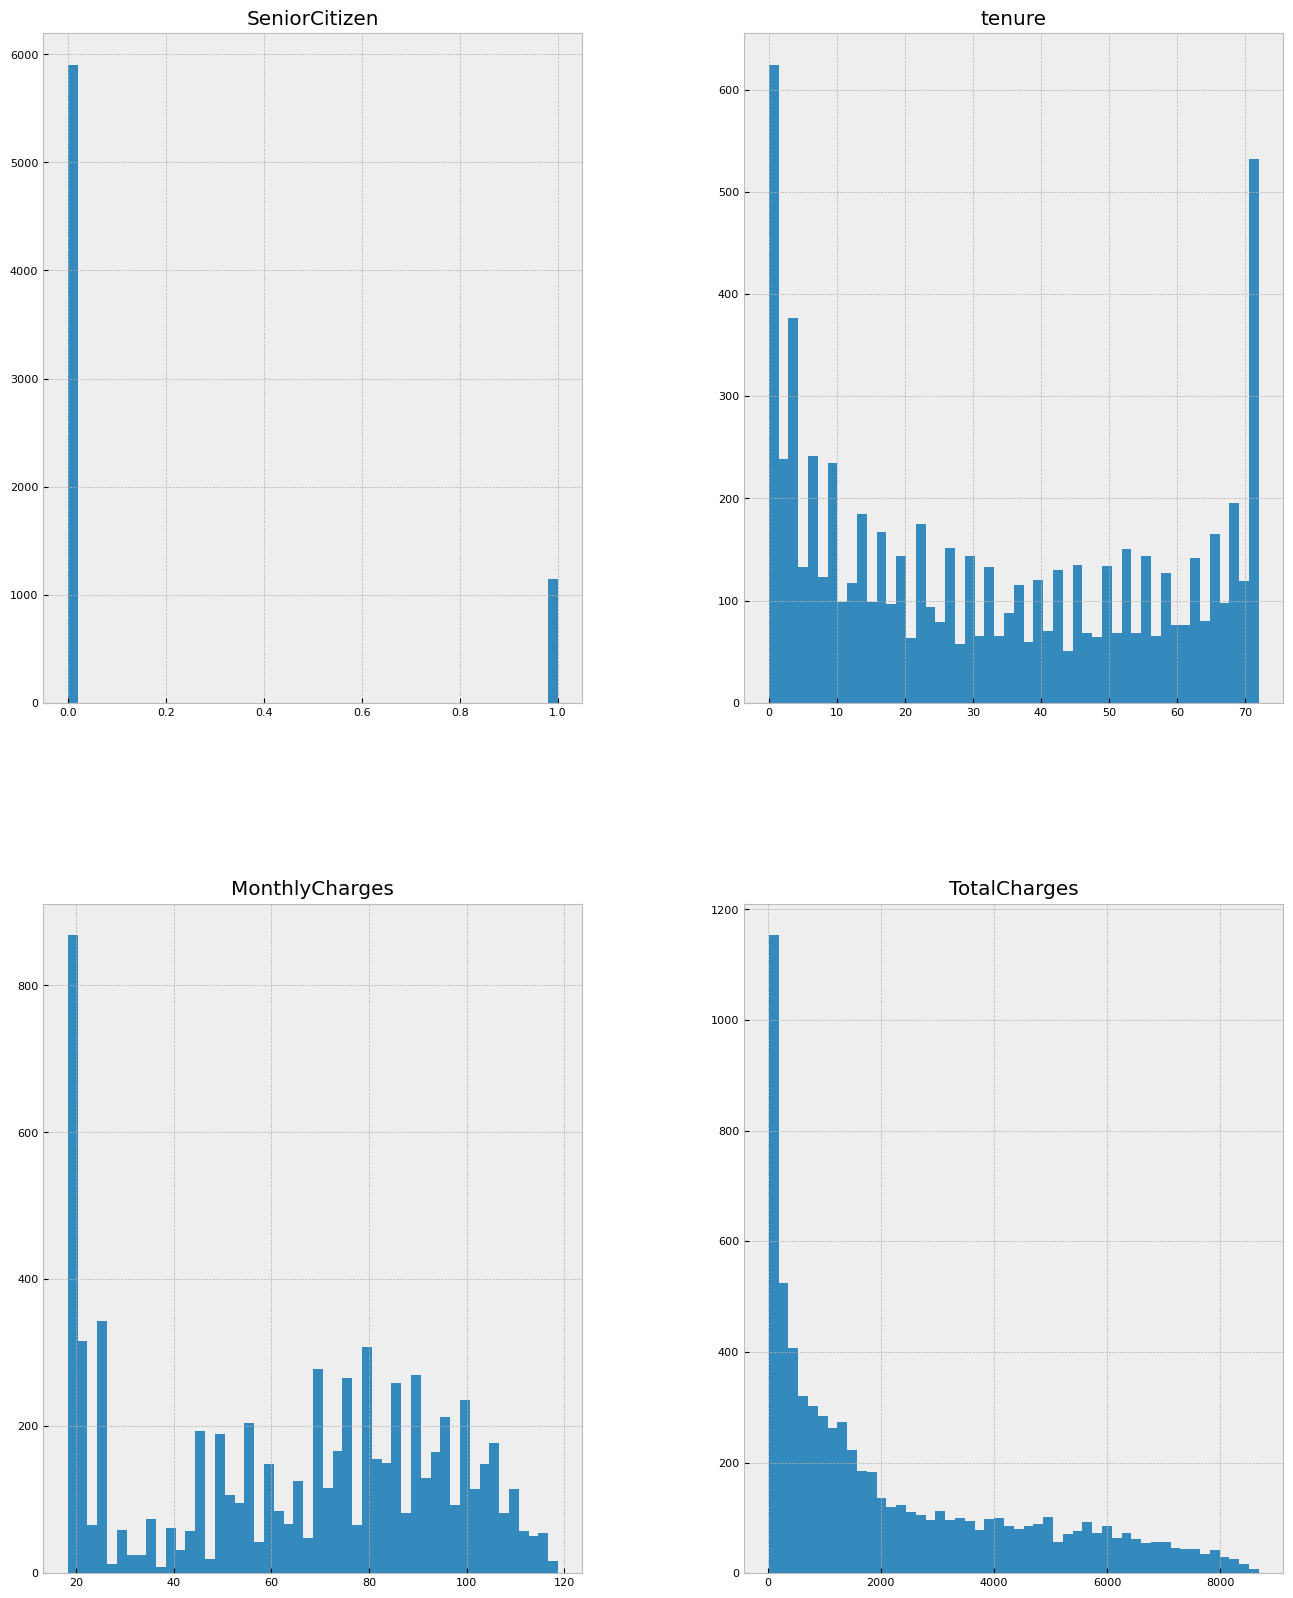

In [13]:
#univariate distributions for other numerical features
num_feat.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

In [14]:
cat_feat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
cat_feat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


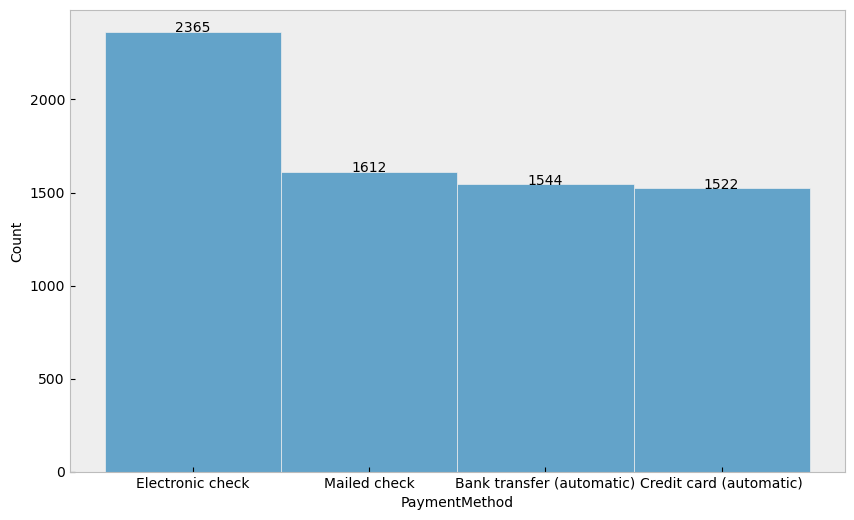

In [16]:
#univariate distributions for categorical features
plt.style.use('bmh')
plt.figure(figsize=(10, 6))

# Create a histogram
ax = sb.histplot(data['PaymentMethod'])

# Remove grid lines
ax.grid(False)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

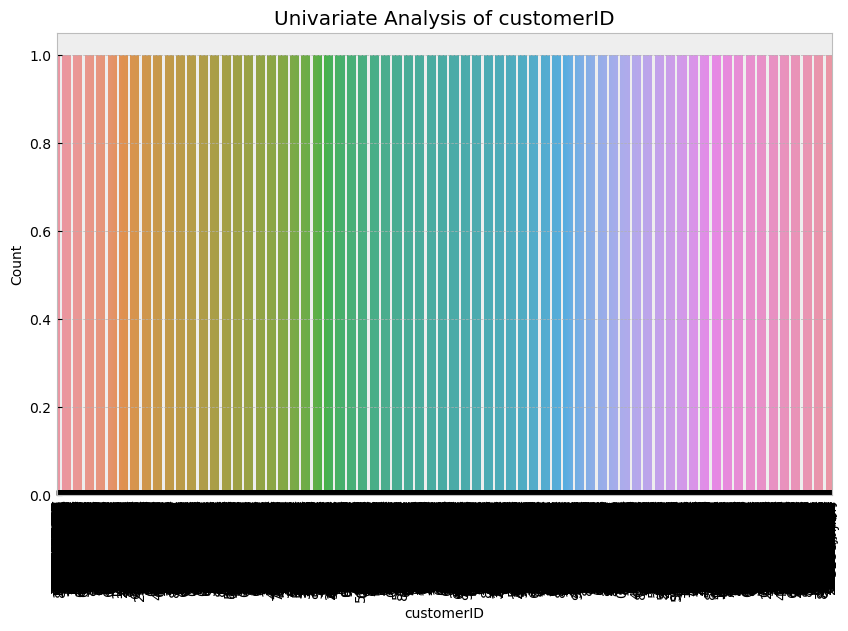

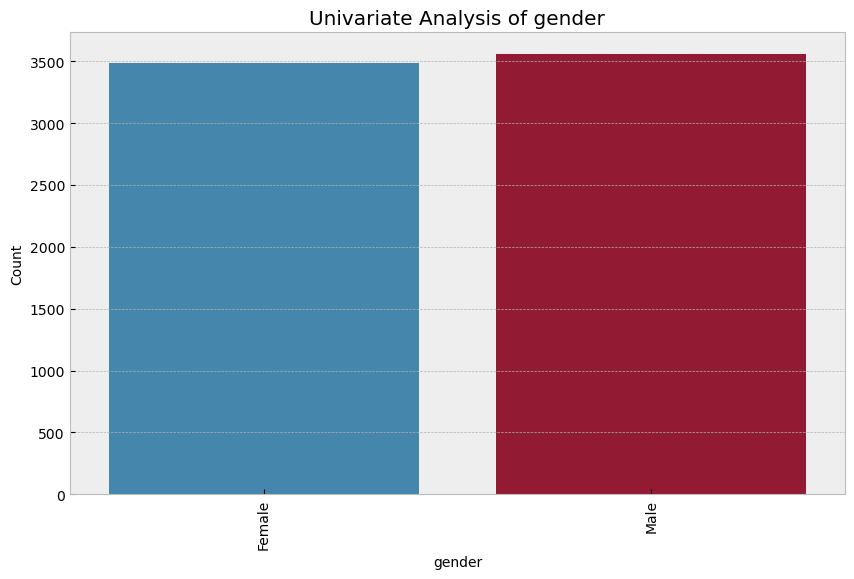

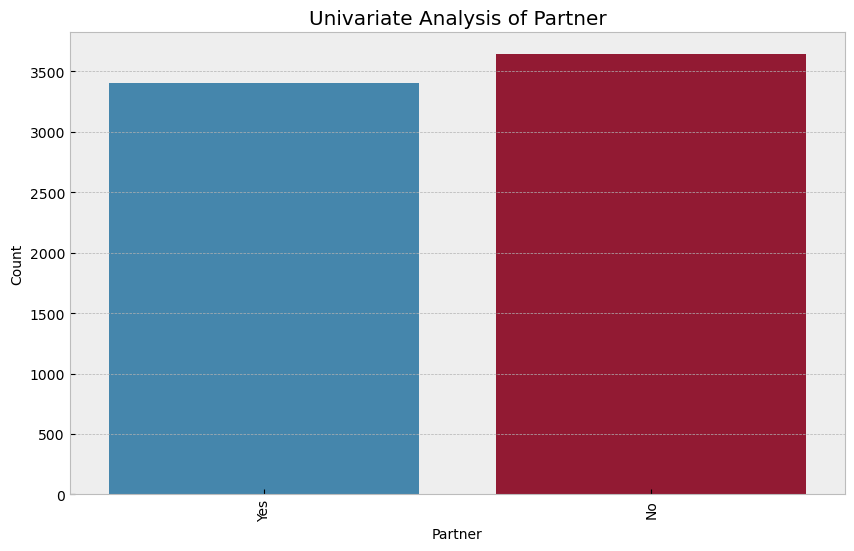

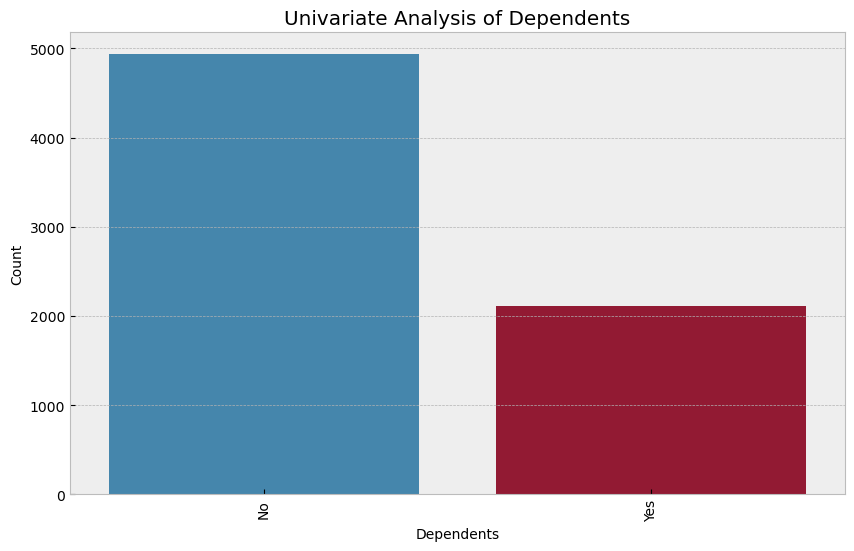

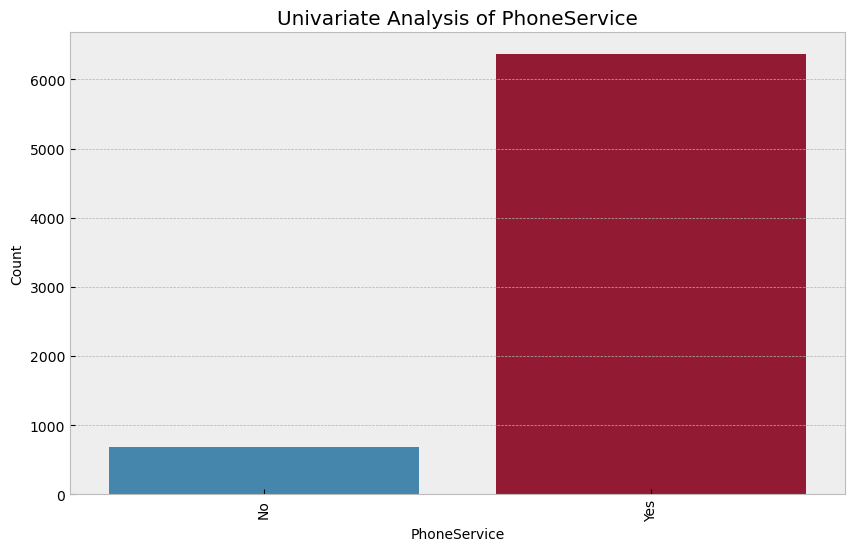

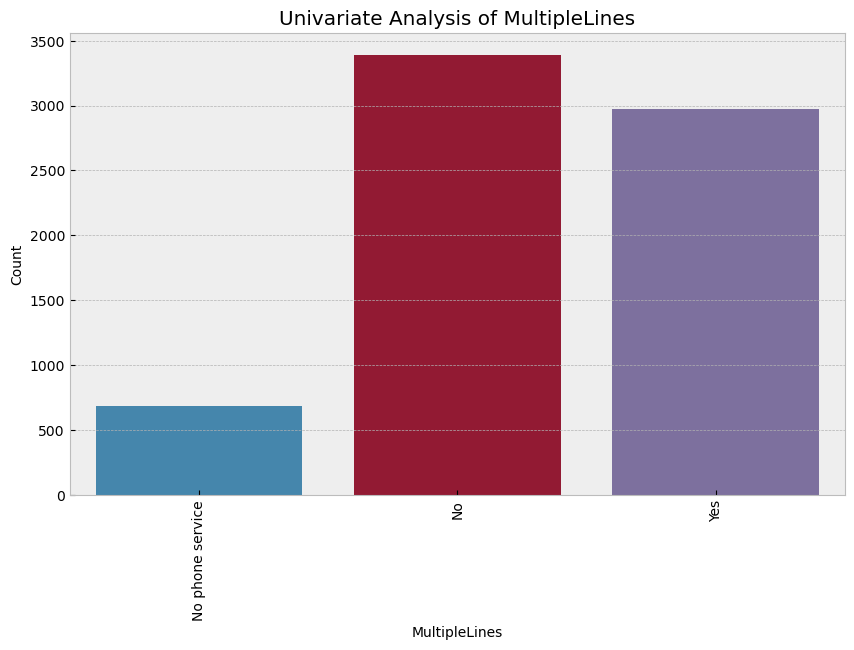

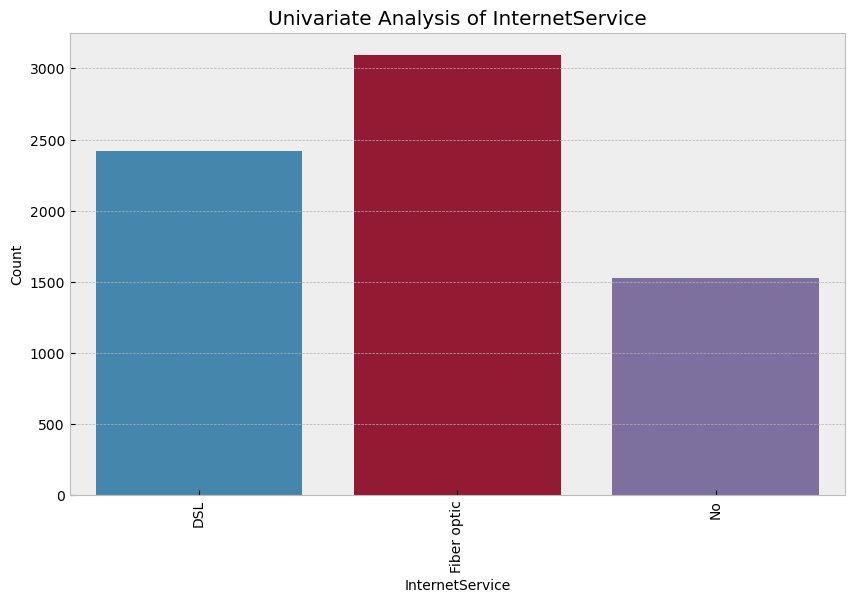

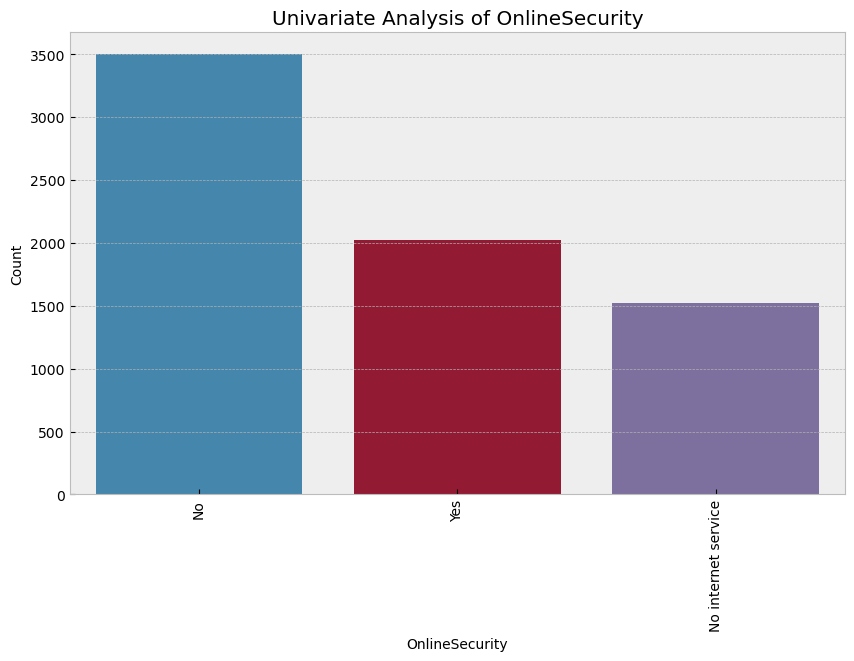

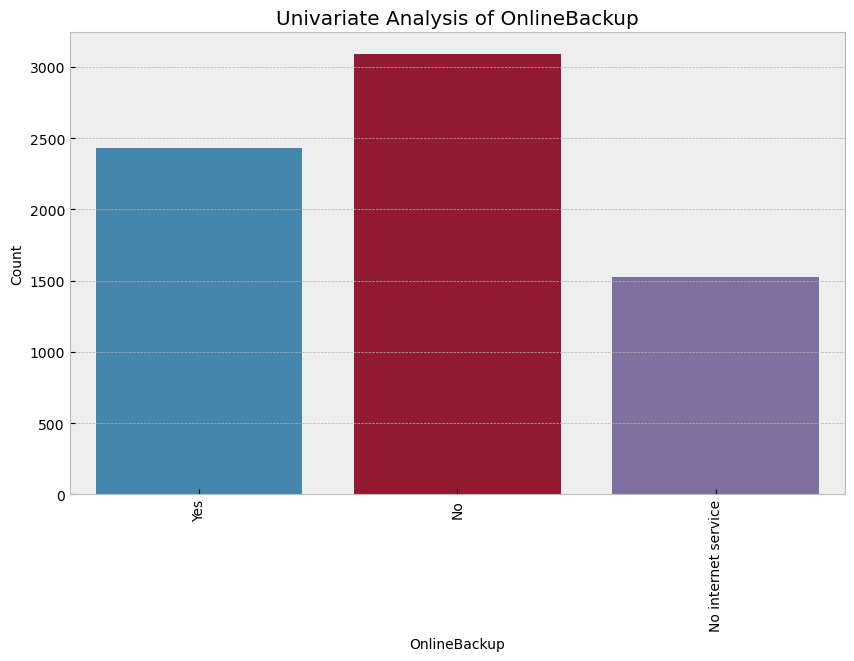

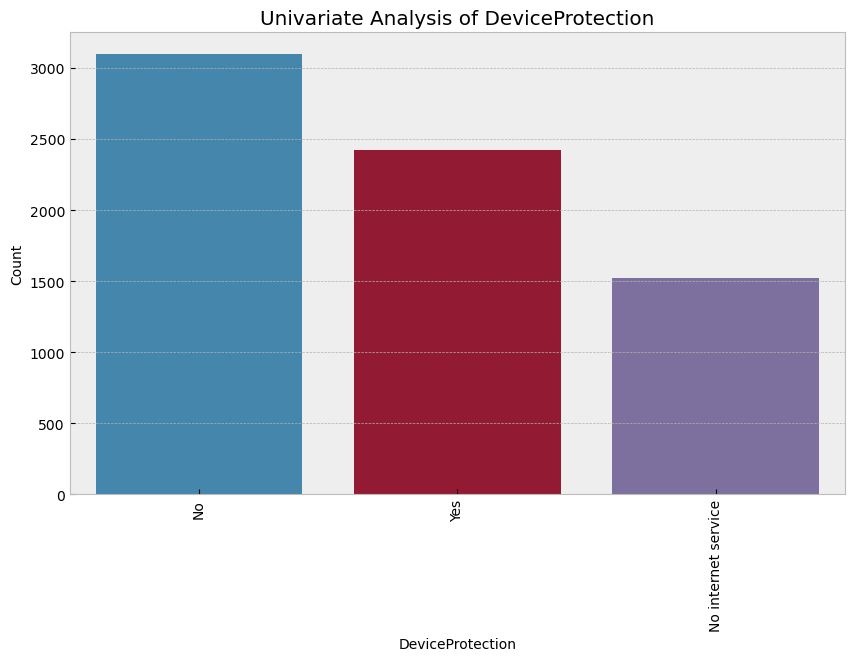

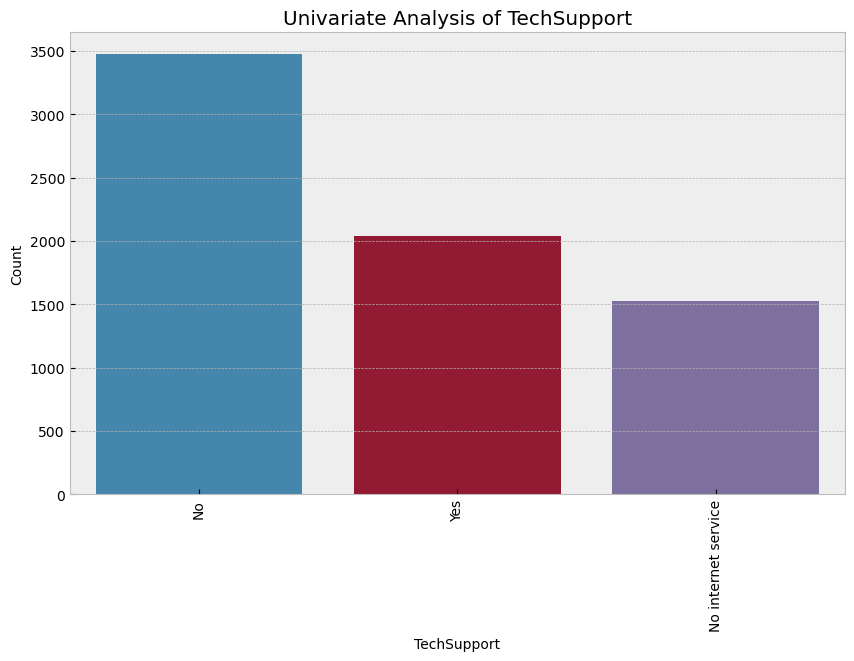

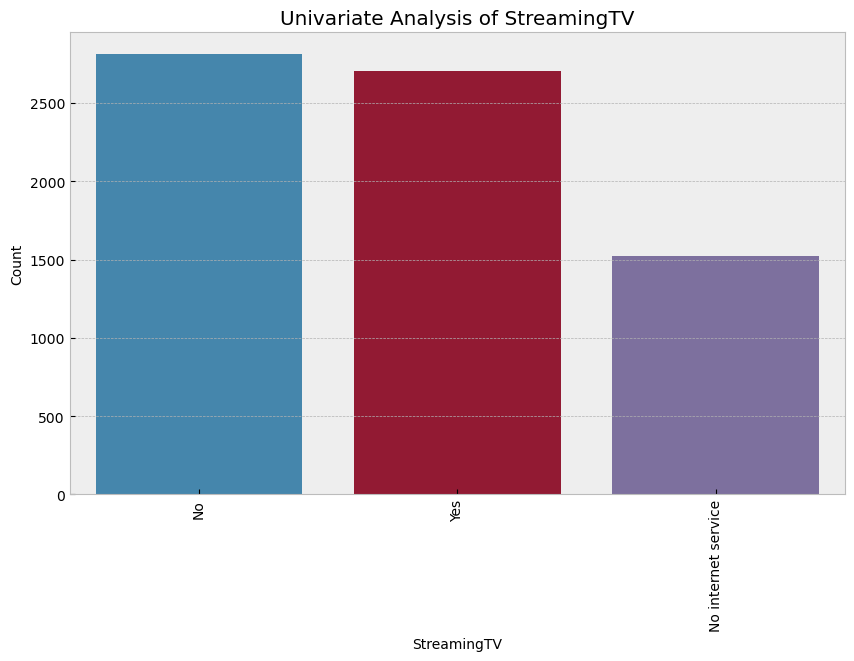

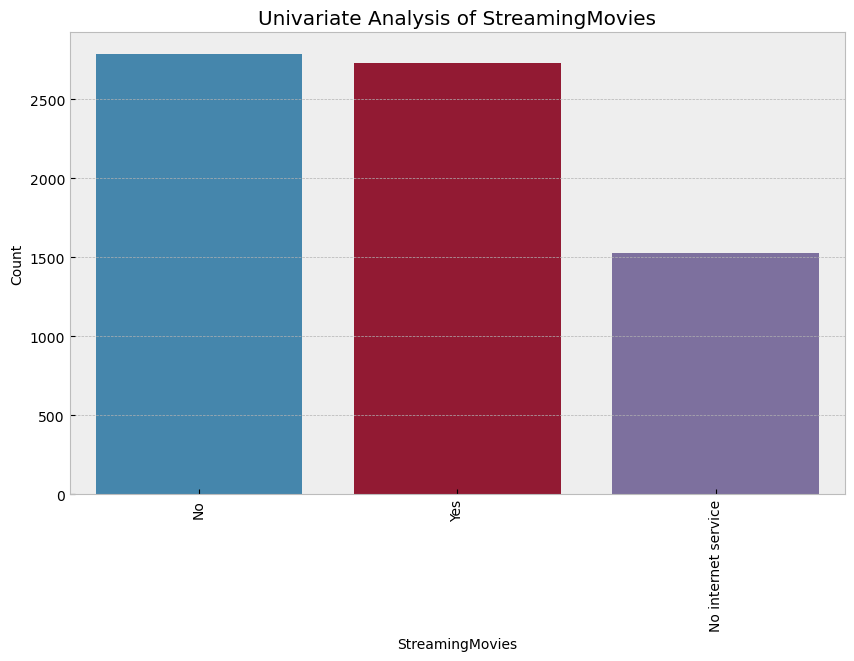

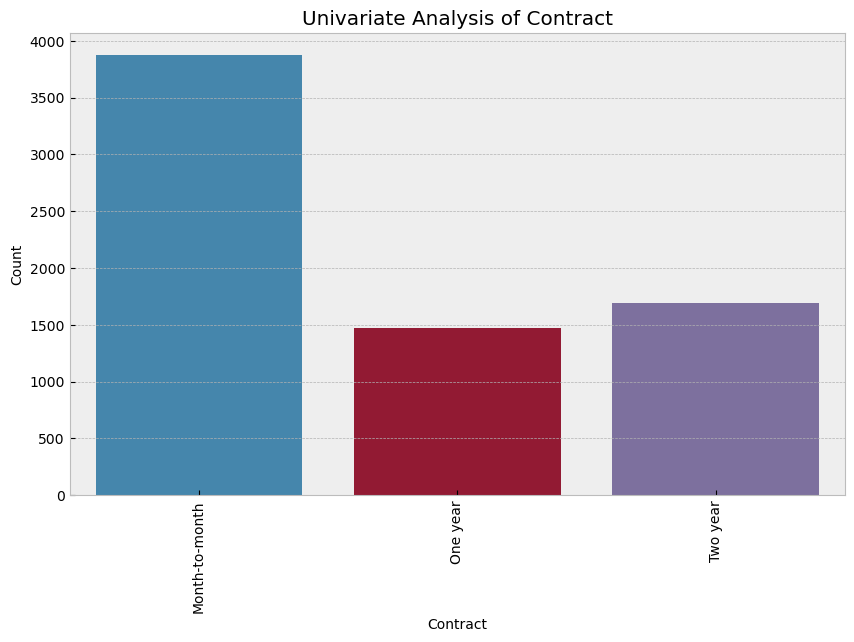

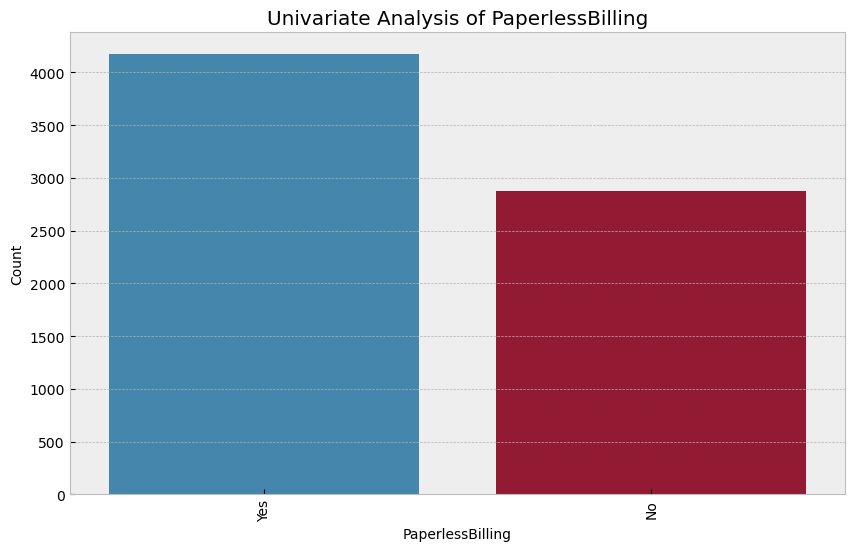

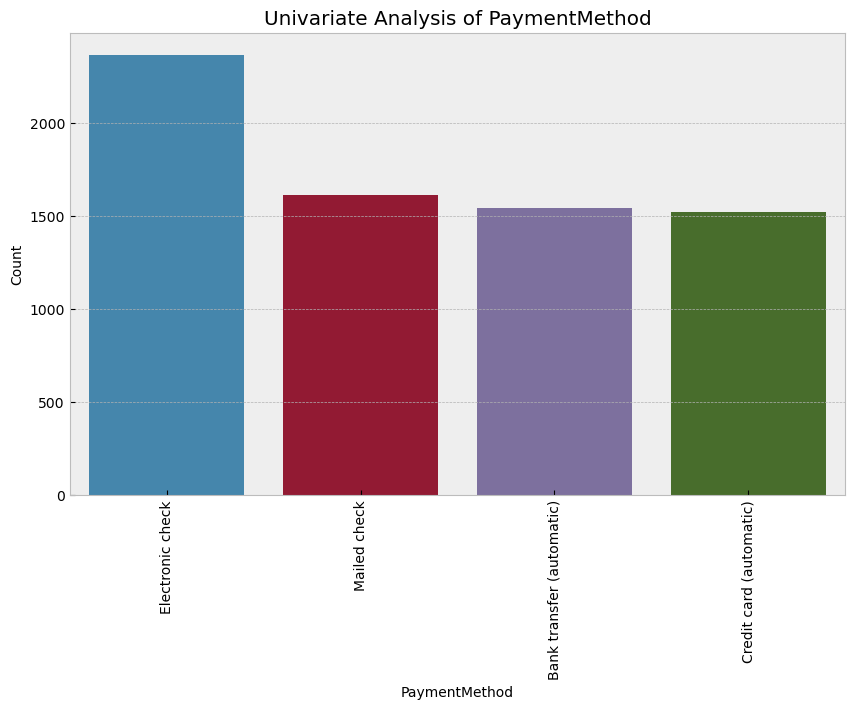

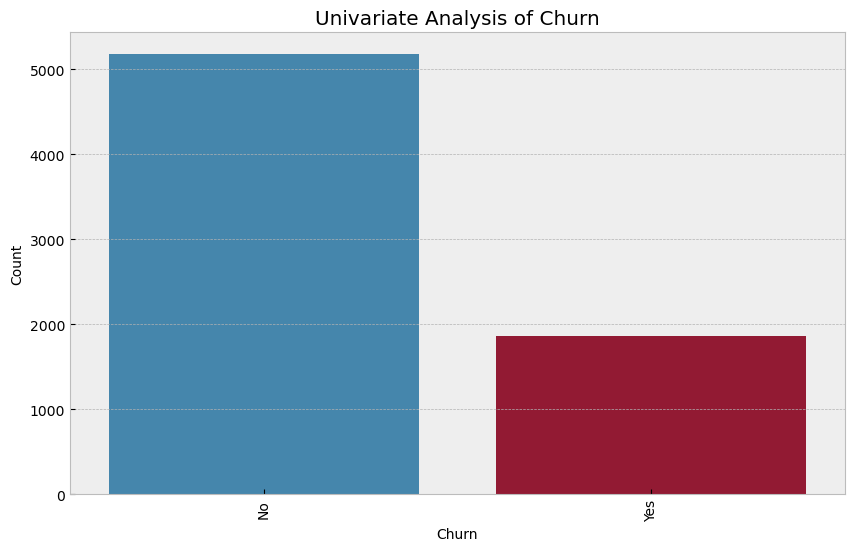

In [17]:
#univariate distributions for all categorical features
for feature in cat_feat:
    plt.figure(figsize=(10, 6))
    sb.countplot(data=data, x=feature)
    plt.title(f'Univariate Analysis of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.show()

### Bivariate Analysis

<Axes: title={'center': 'gender Distribution by Churn'}, xlabel='gender', ylabel='count'>

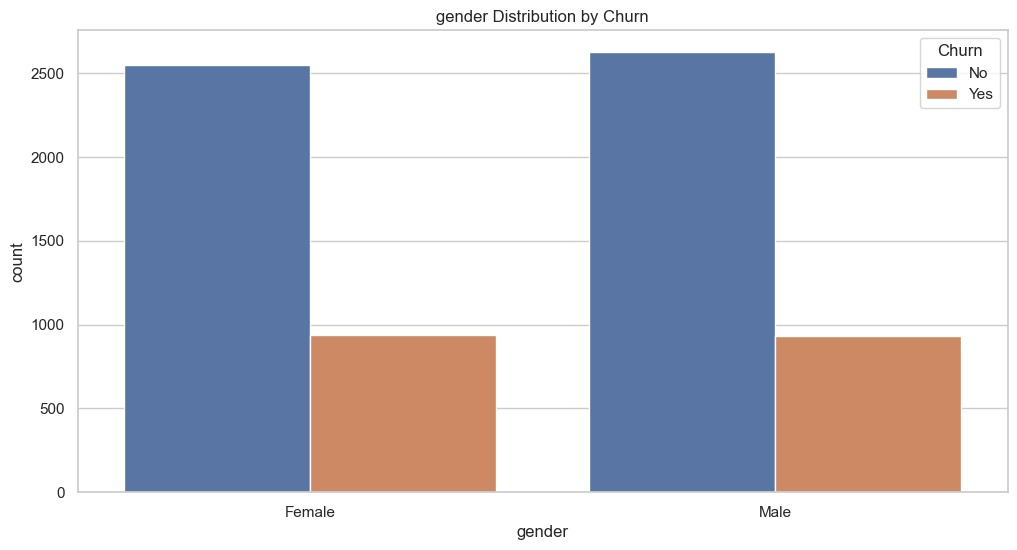

In [18]:
# distribution of Payment Method with hue='Churn'
data['gender'] = data['gender'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('gender Distribution by Churn')
sb.countplot(x='gender', data=data, hue='Churn')

## Observation
This analysis shows that almost the same amount of both male and female customers had churned.


Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

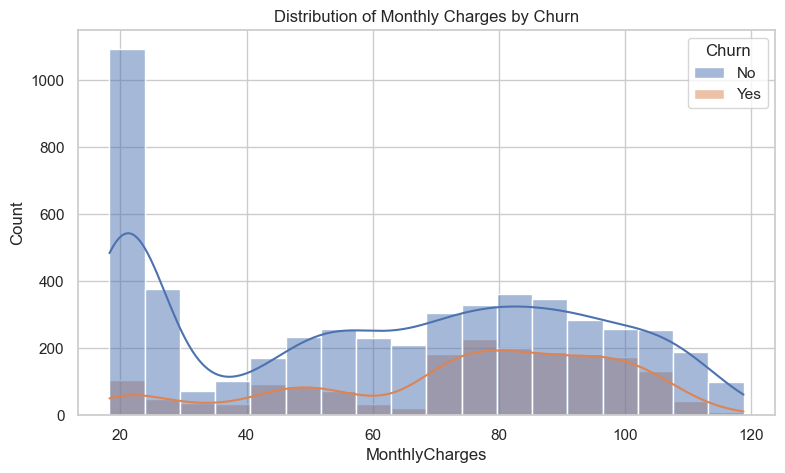

In [19]:
#comparing distributions of the cost of product feature & target
plt.figure(figsize=(9,5))
sb.histplot(data=data, x="MonthlyCharges",hue="Churn",kde=True);
plt.title('Distribution of Monthly Charges by Churn')

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

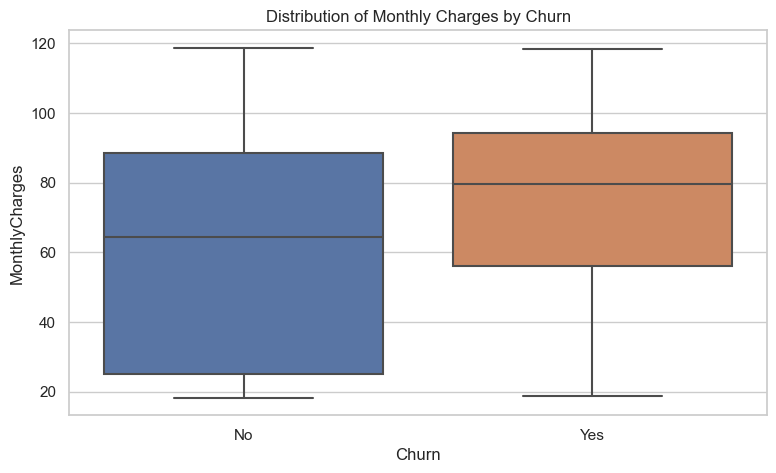

In [20]:
#distribution of the Monthly Charges feature vs target
plt.figure(figsize=(9,5))
sb.boxplot(data=data, y="MonthlyCharges",x="Churn")
plt.title('Distribution of Monthly Charges by Churn')

### Observation
- The median of the monthly charges for customers that had churned (yes) were more than those that had not churned (no), indicating the higher the monthly charges the more likely a customer would cancel his/her service. 


<Axes: title={'center': 'Payment Method Distribution by Churn'}, xlabel='PaymentMethod', ylabel='count'>

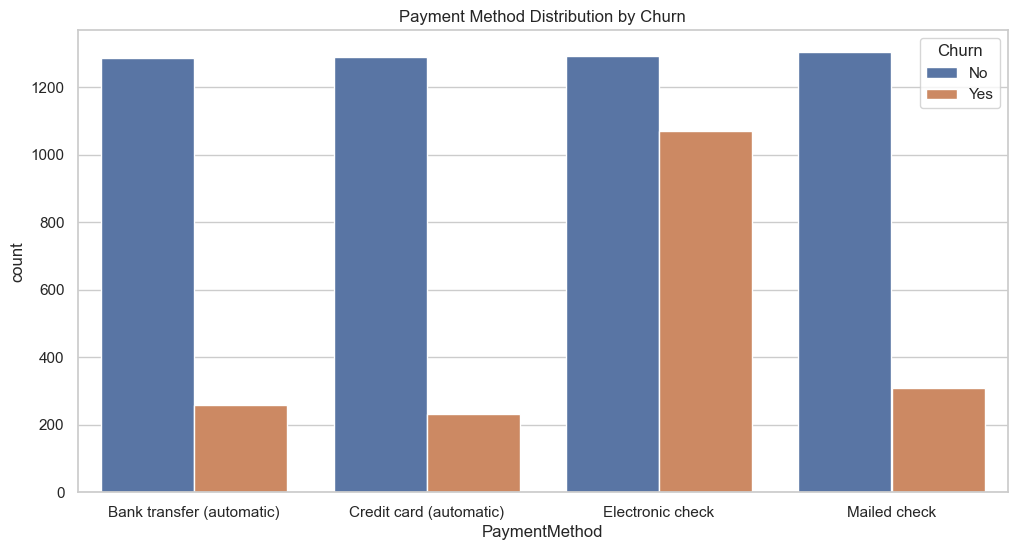

In [21]:
# distribution of Payment Method with hue='Churn'
data['PaymentMethod'] = data['PaymentMethod'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Payment Method Distribution by Churn')
sb.countplot(x='PaymentMethod', data=data, hue='Churn')

### Observation
Customers who used electronic check as payment method have higher potential churn rate than others.


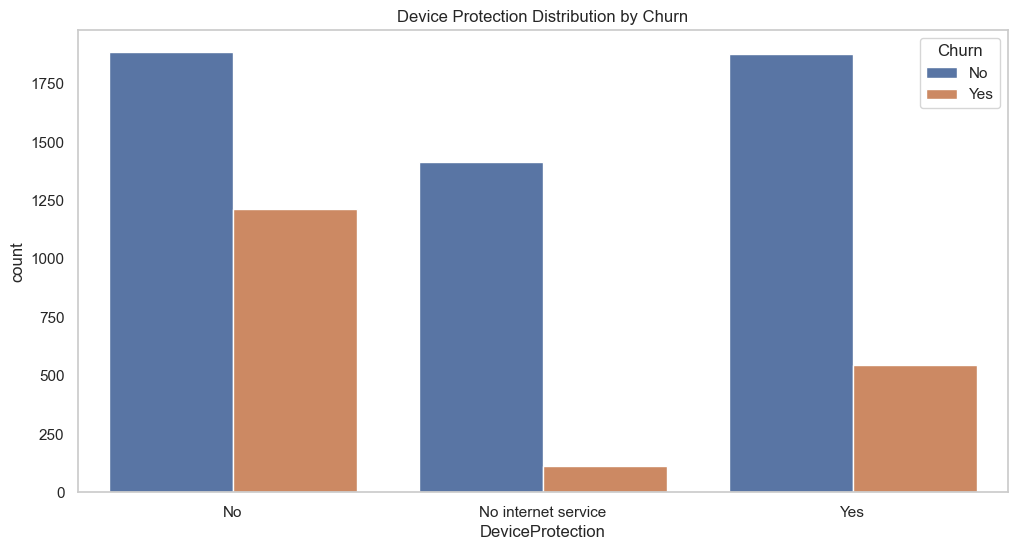

In [22]:
# Device Protection Distribution by Churn
data['DeviceProtection'] = data['DeviceProtection'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Device Protection Distribution by Churn')
sb.countplot(x='DeviceProtection', data=data, hue='Churn')
plt.grid(False)

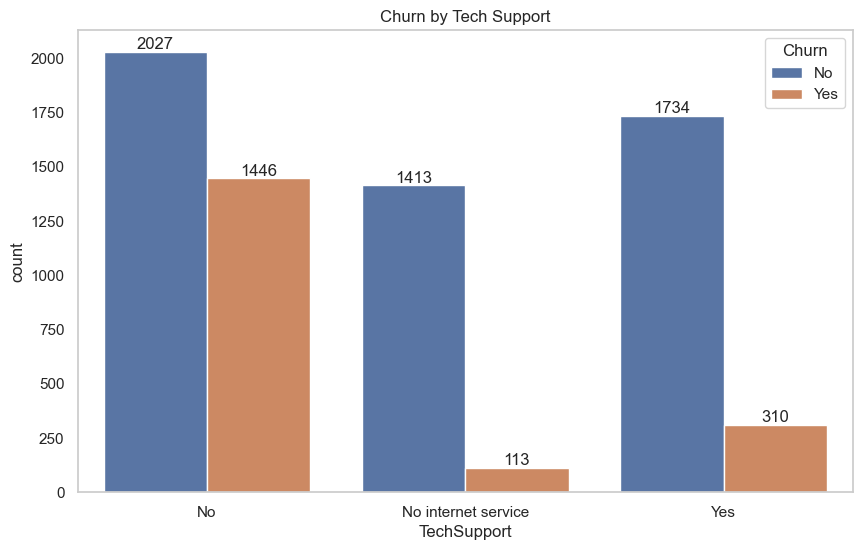

In [23]:
# Distribution of Churn by Tech Support
fig, ax = plt.subplots(figsize=(10, 6))
data['TechSupport'] = data['TechSupport'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.title('Churn by Tech Support')
sb.countplot(x='TechSupport', data=data, hue='Churn')
ax.bar_label(container=ax.containers[0], label="Count of Customers");
ax.bar_label(container=ax.containers[1], label="Count of Customers");
plt.grid(False)

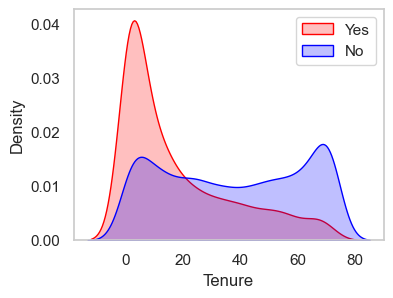

In [24]:
# distribution of Churn by Tenure
fig, ax = plt.subplots(figsize=(4, 3))

# KDE plot for 'Tenure' with different colors for 'yes' and 'no'
sb.kdeplot(data.loc[data['Churn'] == 'Yes', 'tenure'], color='red', fill=True, label='Yes')
sb.kdeplot(data.loc[data['Churn'] == 'No', 'tenure'], color='blue', fill=True, label='No')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.grid(False)

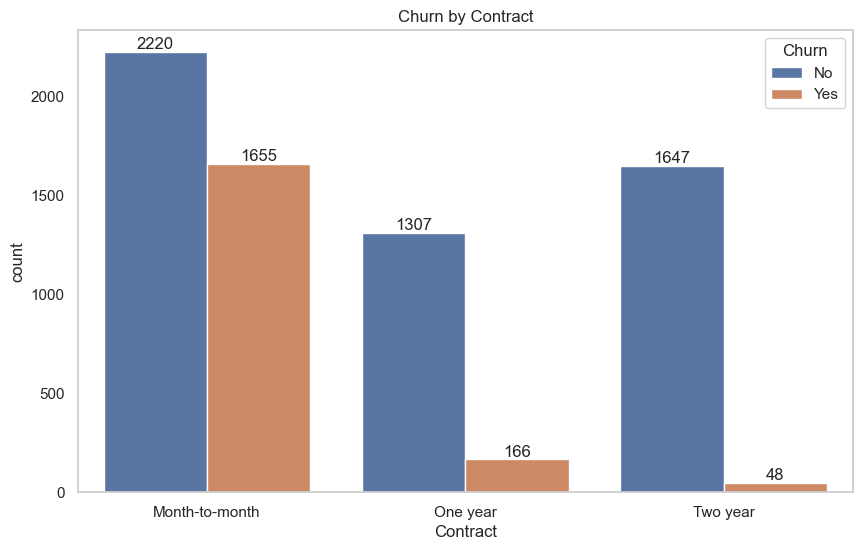

In [25]:
# disctribution of Churn by Contract
fig, ax = plt.subplots(figsize=(10, 6))
data['Contract'] = data['Contract'].astype(dtype='category')
sb.set_theme(style="whitegrid")
plt.title('Churn by Contract')
sb.countplot(x='Contract', data=data, hue='Churn')
ax.bar_label(container=ax.containers[0], label="Count of Customers");
ax.bar_label(container=ax.containers[1], label="Count of Customers");
plt.grid(False)


### Multivariate Analysis

Text(0.5, 1.0, 'Distribution of Monthly Charges by Payment Method by Churn')

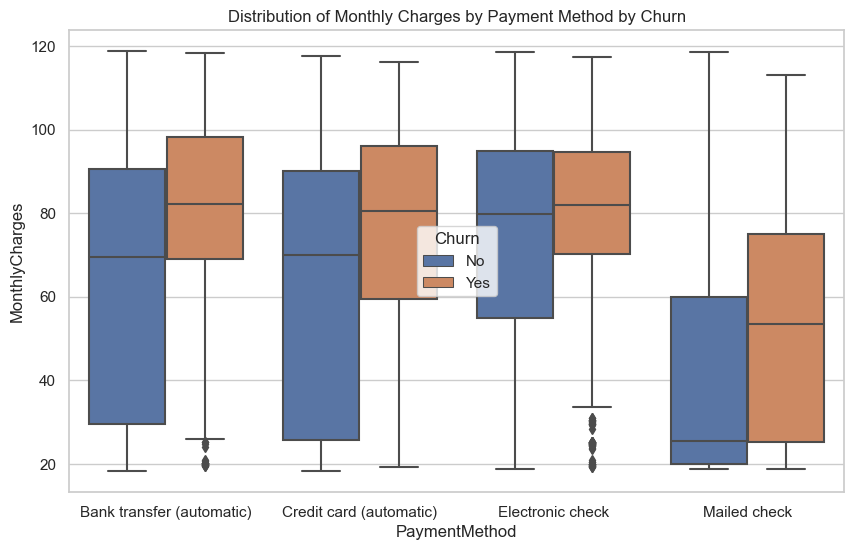

In [26]:
#multivariate distributions of the Monthly Charges featue vs Payment Method vs target feature
plt.figure(figsize = (10,6))
sb.boxplot(y='MonthlyCharges',x='PaymentMethod', hue='Churn',data=data)
plt.title('Distribution of Monthly Charges by Payment Method by Churn')

### Observation
- The median of the monthly charges of customers that had churned (yes) showed higher charges irrespective of the payment method than those that had not churned (no), indicating the higher the monthly charges the more likely a customer would cancel his/her service irrespective of the payment method.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [28]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Remove customer ID columns if not relevant
data = data.drop([col for col in data.columns if 'customerID' in col], axis=1)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature to numerical values
data['Churn'] = label_encoder.fit_transform(data['Churn'])

In [31]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
#segment our data into x dataset and target variable
x = data.drop('Churn',axis=1)
target = data['Churn']

In [33]:
#encoding categorical features into numerical ones using oen hot encoding(get_dummies)
data2 = pd.get_dummies(x,dtype='int64')
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [34]:
#scaling dataset
from sklearn.preprocessing import MinMaxScaler

#instanstiate our scaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data2)
#scaled_data

In [35]:
scaled_data

array([[0.        , 0.01388889, 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47222222, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.02777778, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.15277778, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.05555556, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91666667, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [36]:
# the "scaled_data" will print as an array and we wont be able to see the header. To solve this, we convert the HEADER to a data frame

data2 = pd.DataFrame(scaled_data, columns=data2.columns)

data2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.033210,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### MULTIVARIATE ANALYSIS

##### Since we want to predict customers that can churn, we first evaluate the variables that has a relationship with Churn
##### Using correlation (e.g SeniorCitizen, tenure, MonthlyCharges, TotalCharges etc)

#### CORRELATION MATRIX

In [37]:
data2.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

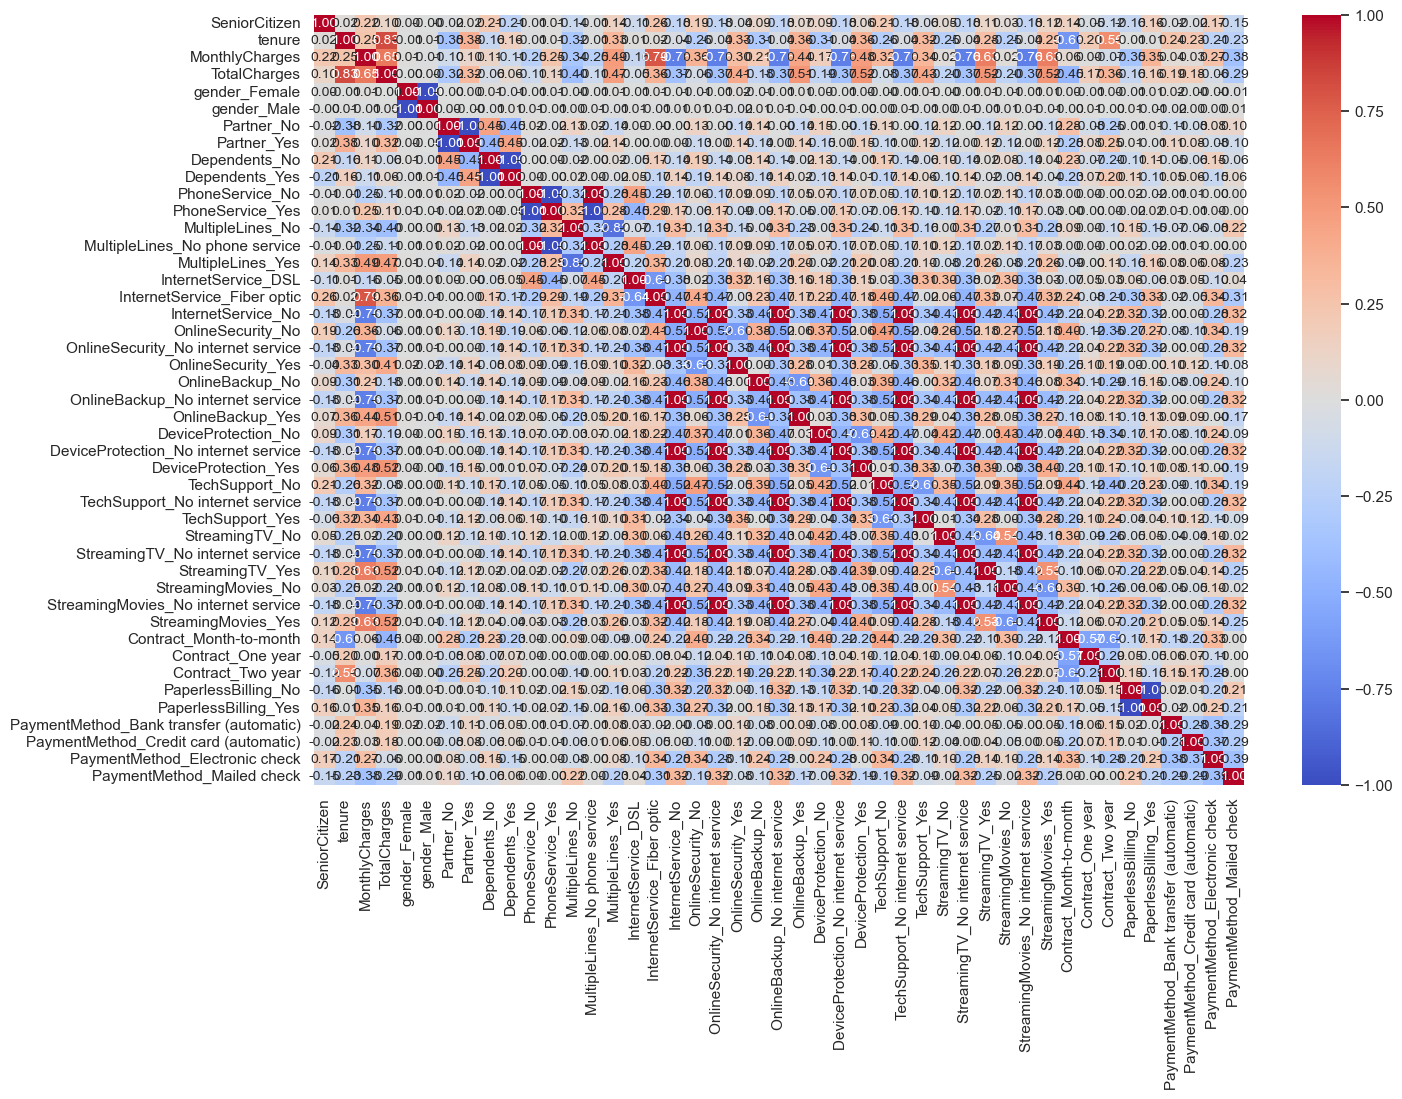

In [38]:
# Correlation between target(Churn) and other variables in the dataset.
plt.figure(figsize=(15,10))
hm = sb.heatmap(data2.corr(), cbar=True, annot=True, cmap ='coolwarm',fmt='.2f', 
                 annot_kws={'size':10})

Strong relationship is from 0.5 to 1 and -0.5 to -1

In [39]:
temp_data = pd.concat([data2, target], axis=1)
correlation = temp_data.corr()[['Churn']].sort_values(by='Churn', ascending=False)
print(correlation)


                                            Churn
Churn                                    1.000000
Contract_Month-to-month                  0.405103
OnlineSecurity_No                        0.342637
TechSupport_No                           0.337281
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
OnlineBackup_No                          0.268005
DeviceProtection_No                      0.252481
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
Dependents_No                            0.164221
SeniorCitizen                            0.150889
Partner_No                               0.150448
StreamingMovies_No                       0.130845
StreamingTV_No                           0.128916
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942


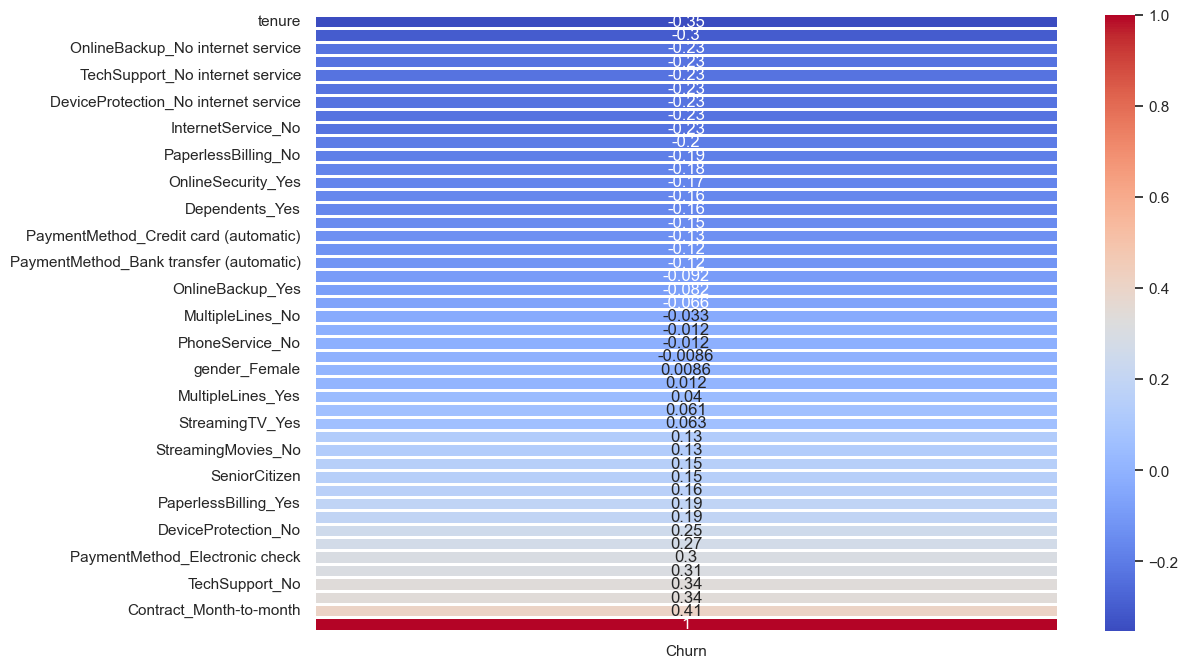

In [40]:
# Add the target (Churn) back to the data2 dataframe
data2['Churn'] = target

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(data2.corr()[['Churn']].sort_values(by='Churn'), linewidths=1, annot=True, cmap='coolwarm')
plt.show()

#### FEATURE ENGINEERING / DATA PRE-PROCESSING

In [41]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
# List of columns you want to drop
columns_to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']

# Drop only the columns that exist in the DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in data.columns]

# Drop the selected columns
data.drop(columns=columns_to_drop_existing, axis=1, inplace=True)

# Check the remaining columns after dropping
data.columns

Index(['tenure', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaymentMethod', 'Churn'],
      dtype='object')

In [43]:
data.head()

,tenure,DeviceProtection,TechSupport,Contract,PaymentMethod,Churn
0,1,No,No,Month-to-month,Electronic check,0
1,34,Yes,No,One year,Mailed check,0
2,2,No,No,Month-to-month,Mailed check,1
3,45,Yes,Yes,One year,Bank transfer (automatic),0
4,2,No,No,Month-to-month,Electronic check,1


In [44]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [45]:
logreg = LogisticRegression()

ohe = OneHotEncoder()

In [46]:
data2.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [47]:
X = data.drop('Churn', axis='columns')

Y = data.Churn

In [48]:
column_trans = make_column_transformer((OneHotEncoder(),
                ['DeviceProtection', 'TechSupport', 'Contract',
       'PaymentMethod']), remainder='passthrough')

In [49]:
data_encoded= column_trans.fit_transform(X)

In [50]:
data_encoded

array([[ 1.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  1., 34.],
       [ 1.,  0.,  0., ...,  0.,  1.,  2.],
       ...,
       [ 1.,  0.,  0., ...,  1.,  0., 11.],
       [ 1.,  0.,  0., ...,  0.,  1.,  4.],
       [ 0.,  0.,  1., ...,  0.,  0., 66.]])

In [51]:
# Get the column names after one-hot encoding

encoded_columns = column_trans.named_transformers_['onehotencoder'] \
    .get_feature_names_out(['DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod'])

In [52]:
# Create the DataFrame with the encoded columns
data_encoded = pd.DataFrame(data_encoded, columns=list(encoded_columns) 
                            + list(X.columns.drop(['DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod'])))

In [53]:
data_encoded

,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,45.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,24.0
7039,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.0
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0
7041,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0


In [54]:
pipe = make_pipeline(column_trans, logreg)

In [55]:
cross_val_score(pipe, X, Y, cv=5, scoring='accuracy').mean()

0.7802086021678819

In [56]:
pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('logisticregression', LogisticRegression())])

In [57]:
pipe.predict(X)

array([1, 0, 0, ..., 1, 0, 0])

### Saving the Model ( Logistic Regression)

In [58]:
import pickle

In [59]:
df = {'model': pipe}
with open ('pipe_chnmod_.pkl', 'wb') as file:
    pickle.dump(df, file)

## Testing new data

#### Loading the model

In [60]:
with open ('pipe_chnmod_.pkl', 'rb') as file:
    df = pickle.load(file)

In [61]:
user_input = {'DeviceProtection': 'No', 'TechSupport': 'No internet service', 'Contract': 'One year', 'PaymentMethod': 'Bank transfer (automatic)','tenure': 6}

user_data = pd.DataFrame([user_input])

In [62]:
user_data

,DeviceProtection,TechSupport,Contract,PaymentMethod,tenure
0,No,No internet service,One year,Bank transfer (automatic),6


In [63]:
pipe.fit(X,Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('logisticregression', LogisticRegression())])

In [64]:

# Make predictions and obtain probabilities
churn_proba = pipe.predict_proba(user_data)[:, 1]  # Assuming you want the probability of the positive class

# Make a decision based on a threshold (adjust the threshold as needed)
threshold = 0.5
churn = 1 if churn_proba > threshold else 0

# Output results
if churn_proba == 1:
    print(f'This customer will churn with a probability of {churn_proba[0]*100:.2f}%')
else:
    print(f'This customer will not churn with a probability of {(1 - churn_proba[0])*100:.2f}%')

This customer will not churn with a probability of 86.12%
